# Снижение размерности векторной модели

**Cнижение размерности** — это преобразование данных, состоящее в уменьшении числа переменных путём получения главных переменных.

![](http://www.sociologos.ru/upload/Image/scaling.jpg)

### Зачем это нужно в  NLP?

1. Чтобы изображать данные на плоскости
2. Тематическое моделирование 


## Сингулярное разложение 

**Сингулярное разложение** *(Singular Value Decomposition, SVD)* — декомпозиция вещественной матрицы с целью ее приведения к каноническому виду (≈ максимально простому).

Сингулярным разложением матрицы $A$ порядка $m \times n$ является разложение следующего вида:

$A=U\Sigma V^{T}$,

где $\Sigma$ — матрица размера $m\times n$ с неотрицательными элементами, у которой элементы, лежащие на главной диагонали — это сингулярные числа (а все элементы, не лежащие на главной диагонали, являются нулевыми), а матрицы $U$ (порядка $m$) и $V$ (порядка $n$) — это две унитарные матрицы, состоящие из левых и правых сингулярных векторов соответственно (а $V^{T}$ — это сопряжённо-транспонированная матрица к $V$). 

[Подробнее тут](http://www.machinelearning.ru/wiki/index.php?title=%D0%A1%D0%B8%D0%BD%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D0%B7%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5).

<img src='img/svd.png' width=500>


## PCA

**PCA** *(principal component analysis)* — метод главных компонент, изобретен К. Пирсоном еще в 1901 г. Вычисление главных компонент сводится либо к вычислению собственных векторов и собственных значений ковариационной матрицы исходных данных, либо к сингулярному разложению матрицы. Реализован в `sklearn`, [вот документация](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA).

[Подробнее тут](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82).

<img src='https://cdn-images-1.medium.com/max/1200/1*vfLvJF8wHaQjDaWv6Mab2w.png' width=500>


## LSA (LSI)

Первый шаг — tf-idf преобразование, второй шаг — SVD. 

В `sklearn` называется `TruncatedSVD`, [документация вот](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html). 

## t-SNE

**t-SNE**  (*t-distributed Stochastic Neighbor Embedding* (стохастическое вложение соседей с t-распределением) — техника нелинейного снижения размерности и визуализации многомерных переменных. Метод разработан специально для данных очень высокой размерности Л. ван дер Маатеном и Д. Хинтоном, [вот их статья](http://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf). На хабре есть хорошая [статья](https://habr.com/ru/post/267041/), где объясняется математический смысл и принцип работы этого алгоритма.

## Другие методы

Методов разложения матриц [немало](https://en.wikipedia.org/wiki/Dimensionality_reduction) (в `sklearn` есть [вот что](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)), но в компьютерной лингвистике пользуются, как правило, названными выше.


# Кластеризация

Снижение размерности пригодится нам, например, для визуализации результатов кластерного анализа. Попробуем на примере все тех же 20newsgrops из `sklearn`.

Некоторые алгоритмы кластеризации ([вот очень хорошее описание](https://scikit-learn.org/stable/modules/clustering.html#clustering) из документации `sklearn`):

* [K-Means](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)
* [Mini-Batch K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html#sklearn.cluster.MiniBatchKMeans)
* [Spectral Clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering)
* [Hierarchical Agglomerative Clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)
* [Affinity Propagation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html#sklearn.cluster.AffinityPropagation)
* [MeanShift](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#sklearn.cluster.MeanShift)
* [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)


![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)


### Что входит в Pipeline
* [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) – векторизация
    * max_df – максимальная документная частота 
    * max_features – максимальное количество признаков
    * min_df – минимальная документная частота
    * ngram_range – интервал для $n$-грам
    * analyzer –  задает элемент текста {‘word’, ‘char’, ‘char_wb’}  
    * stop_words – стоп-слова
* [TfidfTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html) – $tf-idf$ преобразование
    * можно не использовать
    * можно вместо *CountVectorizer* сразу использовать *TfidfVectorizer*
* Снижение размерности (для визуализации)
    * [TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) – сингулярное разложение (а именно LSA)
    * [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) (метод главных компонент)
* [Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html) – нормировка (сумма по столбцу будет равна 1)
    * можно не использовать
* Последний этап – какой-либо алгоритм кластеризации, см. выше (можно выбрать любой, в примере ниже – KMeans)

Необязательно включать все этапы в пайплайн, можно выполнять их и по-отдельности. 

**NB!** Все ссылки ведут на документацию `sklearn`.

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import *
from sklearn.metrics import *
from sklearn.cluster import *
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import *
from sklearn.decomposition import TruncatedSVD, PCA

from sklearn.datasets import fetch_20newsgroups

In [71]:
cats = ['talk.religion.misc', 'sci.space', 'talk.politics.mideast', 'comp.graphics']

dataset = fetch_20newsgroups(subset='all', shuffle=True, random_state=42, categories=cats)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))

data = dataset.data
labels = dataset.target

3528 documents
4 categories


In [72]:
dataset.target_names

['comp.graphics', 'sci.space', 'talk.politics.mideast', 'talk.religion.misc']

Векторизуем данные.

In [73]:
vect = TfidfVectorizer(max_df=0.8, min_df=5, ngram_range=(1,3), analyzer='word', stop_words ='english')
X = vect.fit_transform(data)
X.shape

(3528, 37147)

K-Means требует указать количество кластеров. Предположим, что их число равно числу тем, по которым разделены наши документы.

In [74]:
n_clusters = len(dataset.target_names)
clf = KMeans(n_clusters=n_clusters)

%time result = clf.fit_predict(X)

Wall time: 2min 57s


## PCA

In [75]:
pca = PCA(n_components=2)
X_2D_PCA = pca.fit_transform(X.todense())
centers = pca.fit_transform(clf.cluster_centers_)

### Цвета = кластеры

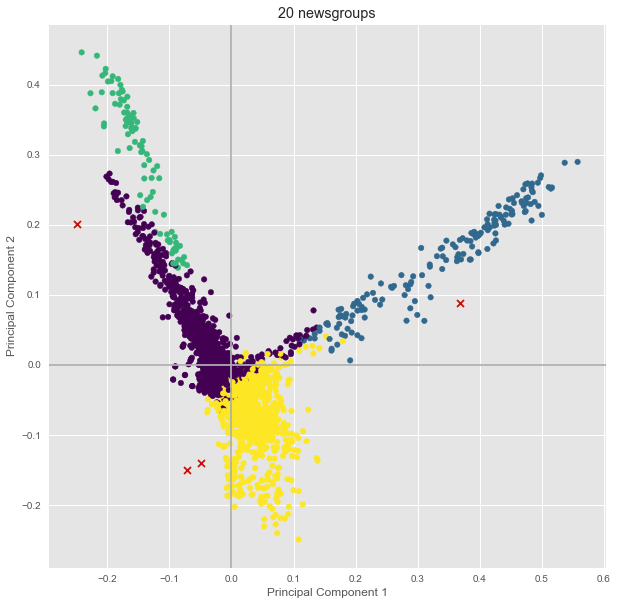

In [76]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

plt.figure(figsize = (10,10))
plt.axhline(0, color='#afafaf')
plt.axvline(0, color='#afafaf')

for i in range(n_clusters):
    try:
        plt.scatter(X_2D_PCA[i:,0], X_2D_PCA[i:,1], s=30, c=clf.labels_, cmap='viridis')
    except (KeyError, ValueError) as e: # костыль для бага матплотлиба
        pass

plt.scatter(centers[:,0], centers[:,1], marker="x", c='r')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('20 newsgroups')
plt.show()

### Цвета = темы

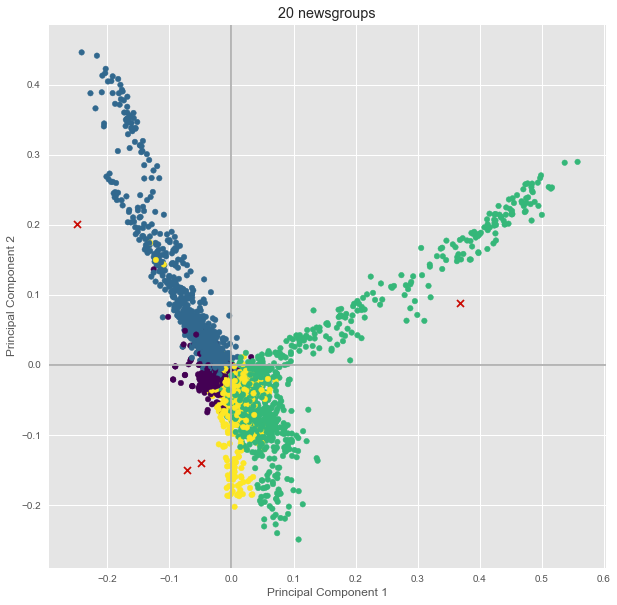

In [85]:
plt.figure(figsize = (10,10))
plt.axhline(0, color='#afafaf')
plt.axvline(0, color='#afafaf')

for i in range(n_clusters):
    try:
        plt.scatter(X_2D_PCA[i:,0], X_2D_PCA[i:,1], s=30, c=labels, cmap='viridis')
    except (KeyError, ValueError) as e: # костыль для бага матплотлиба
        pass

plt.scatter(centers[:,0], centers[:,1], marker="x", c='r')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('20 newsgroups')
plt.show()

## LSA (TruncatedSVD)

В отличие от PCA, не высчитывает центры кластеров.

In [86]:
svd = TruncatedSVD(n_components=2)
X_2D_SVD = svd.fit_transform(X.todense())

### Цвета = кластеры

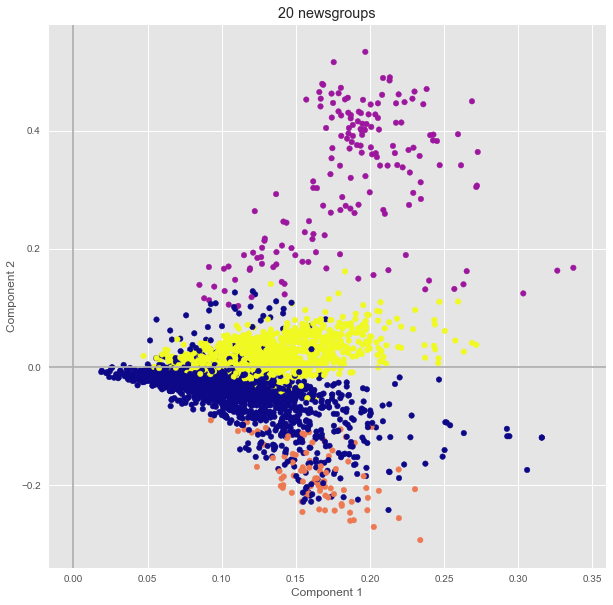

In [87]:
plt.figure(figsize = (10,10))
plt.axhline(0, color='#afafaf')
plt.axvline(0, color='#afafaf')

for i in range(n_clusters):
    try:
        plt.scatter(X_2D_SVD[i:,0], X_2D_SVD[i:,1], s=30, c=clf.labels_, cmap='plasma')
    except (KeyError, ValueError) as e: # костыль для бага матплотлиба
        pass

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('20 newsgroups')
plt.show()

### Цвета = темы

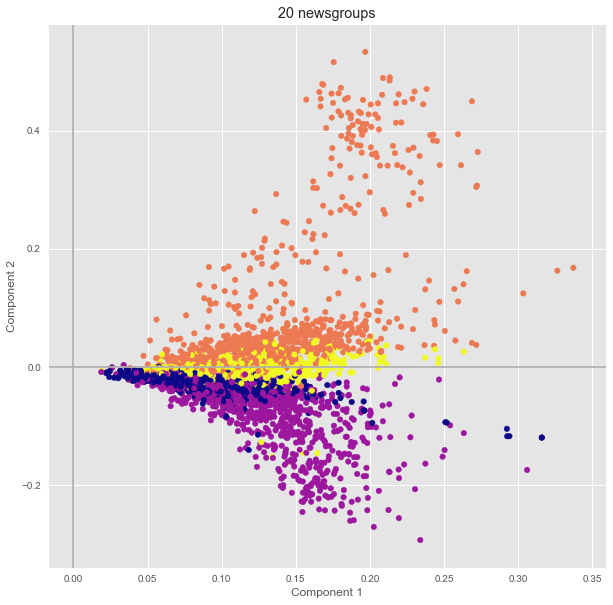

In [88]:
plt.figure(figsize = (10,10))
plt.axhline(0, color='#afafaf')
plt.axvline(0, color='#afafaf')

for i in range(n_clusters):
    try:
        plt.scatter(X_2D_SVD[i:,0], X_2D_SVD[i:,1], s=30, c=labels, cmap='plasma')
    except (KeyError, ValueError) as e: # костыль для бага матплотлиба
        pass

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('20 newsgroups')
plt.show()

## t-SNE

### Способ №1

Дополнительна операция над LSA (TruncatedSVD) или PCA.

In [89]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_2D_SVD)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3528 samples in 0.001s...
[t-SNE] Computed neighbors for 3528 samples in 0.105s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3528
[t-SNE] Computed conditional probabilities for sample 2000 / 3528
[t-SNE] Computed conditional probabilities for sample 3000 / 3528
[t-SNE] Computed conditional probabilities for sample 3528 / 3528
[t-SNE] Mean sigma: 0.003938
[t-SNE] Computed conditional probabilities in 0.345s
[t-SNE] Iteration 50: error = 72.3026810, gradient norm = 0.0399956 (50 iterations in 2.080s)
[t-SNE] Iteration 100: error = 63.0348854, gradient norm = 0.0102599 (50 iterations in 1.714s)
[t-SNE] Iteration 150: error = 61.5039139, gradient norm = 0.0046541 (50 iterations in 1.721s)
[t-SNE] Iteration 200: error = 60.9937325, gradient norm = 0.0025827 (50 iterations in 1.677s)
[t-SNE] Iteration 250: error = 60.7997131, gradient norm = 0.0006099 (50 iterations in 1.692s)
[t-SNE] KL divergence after 250 iterat

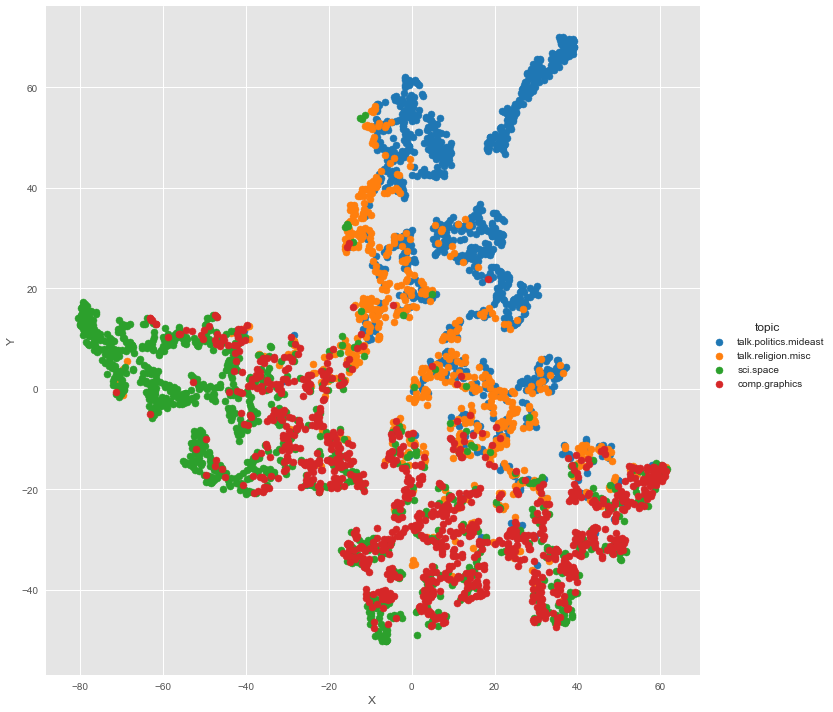

In [90]:
import seaborn as sns

sns.set_palette('tab10')

# достаем названия тем по их номерам
topics = [dataset.target_names[t] for t in labels]

df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'topic' : topics})
sns.FacetGrid(df, hue="topic", size=10).map(plt.scatter, "X", "Y").add_legend()

In [91]:
X_embedded_2 = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_2D_PCA)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3528 samples in 0.004s...
[t-SNE] Computed neighbors for 3528 samples in 0.106s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3528
[t-SNE] Computed conditional probabilities for sample 2000 / 3528
[t-SNE] Computed conditional probabilities for sample 3000 / 3528
[t-SNE] Computed conditional probabilities for sample 3528 / 3528
[t-SNE] Mean sigma: 0.002964
[t-SNE] Computed conditional probabilities in 0.345s
[t-SNE] Iteration 50: error = 73.6466293, gradient norm = 0.0534900 (50 iterations in 2.390s)
[t-SNE] Iteration 100: error = 63.2493362, gradient norm = 0.0131954 (50 iterations in 1.737s)
[t-SNE] Iteration 150: error = 61.0452690, gradient norm = 0.0097500 (50 iterations in 1.716s)
[t-SNE] Iteration 200: error = 60.1901054, gradient norm = 0.0050203 (50 iterations in 1.731s)
[t-SNE] Iteration 250: error = 59.7727966, gradient norm = 0.0025900 (50 iterations in 1.646s)
[t-SNE] KL divergence after 250 iterat

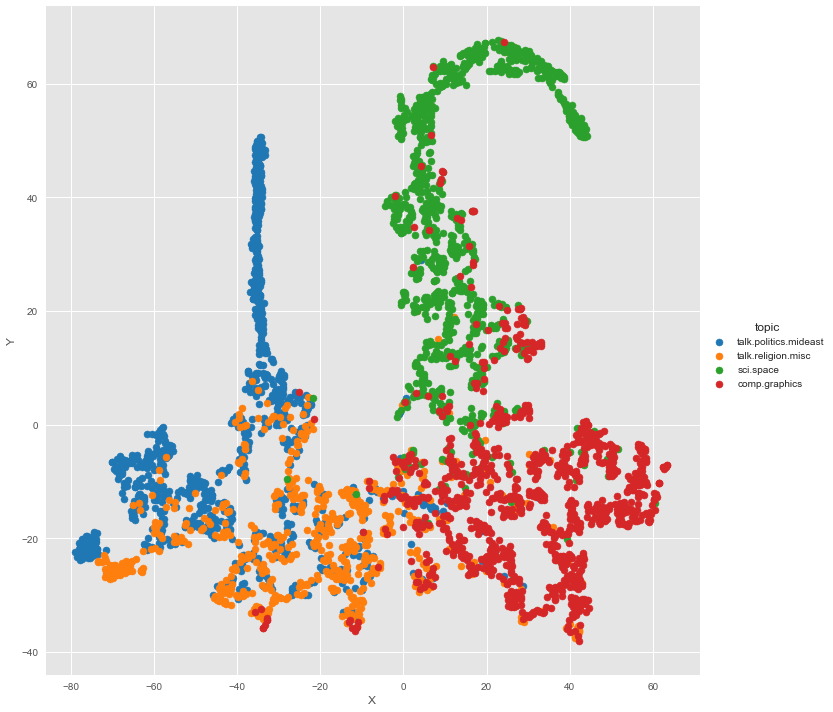

In [92]:
df = pd.DataFrame({'X': X_embedded_2[:, 0], 'Y': X_embedded_2[:, 1], 'topic' : topics})
sns.FacetGrid(df, hue="topic", size=10).map(plt.scatter, "X", "Y").add_legend()

### Способ №2

Документация реализации этого алгоритма из библиотеки `yellowbrick` [тут](http://www.scikit-yb.org/en/latest/api/text/tsne.html).

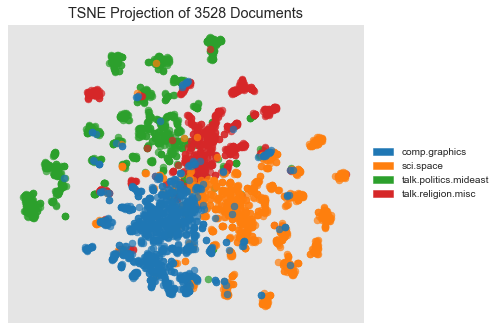

In [93]:
import yellowbrick
from yellowbrick.text import TSNEVisualizer

# В X все еще лежит векторизованный корпус 
tsne = TSNEVisualizer()
tsne.fit(X, topics)
tsne.poof()

### Оценка качества кластеризации

Измерить качество по одной из следующих метрик можно только если известны настоящие метки документов. 

* [Homogenity Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html#sklearn.metrics.homogeneity_score)
* [Completeness Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html#sklearn.metrics.completeness_score)
* [V-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html#sklearn.metrics.v_measure_score)
* [Adjusted Rand-Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score)
* [Adjusted Mutual Information](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html#sklearn.metrics.adjusted_mutual_info_score)

In [94]:
print("Homogeneity:", homogeneity_score(labels, clf.labels_))
print("Completeness:", completeness_score(labels, clf.labels_))
print("V-measure",  v_measure_score(labels, clf.labels_))
print("Adjusted Rand-Index:",  adjusted_rand_score(labels, clf.labels_))
print("Adjusted Mutual Information:",  adjusted_mutual_info_score(labels, clf.labels_))

Homogeneity: 0.33578420254427516
Completeness: 0.5128232464241104
V-measure 0.4058365150011814
Adjusted Rand-Index: 0.28495923700890163
Adjusted Mutual Information: 0.33516248547291105


# Задание

Проделайте все то же самое с другим набором тем. Хорошо ли отделяются друг от друга близкие темы (например, 'sci.crypt',  'sci.electronics',  'sci.med',  'sci.space')? Соответствует ли количество тем количеству кластеров, или же кластеров больше/меньше? 